## Autor: Xavier Seminario Monllaó (1603853)

## IMPORTS I CÁRREGA DEL DATASET

https://www.kaggle.com/datasets/currie32/crimes-in-chicago

In [179]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns
from scipy.special import pbdn_seq
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
plt.style.use('seaborn')
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn import svm
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import mean_absolute_error,roc_curve,auc,roc_auc_score,f1_score,precision_recall_curve,classification_report,confusion_matrix

In [2]:
def visualize_confusion_matrix(y_pred, y_real):
    #mostra la matriu de confusió
    cm = confusion_matrix(y_real, y_pred)
    plt.subplots(figsize=(10, 6))
    sns.heatmap(cm, annot = True, fmt = 'g')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

In [3]:
file1 = 'Chicago_Crimes_2001_to_2004.csv'
file2 = 'Chicago_Crimes_2005_to_2007.csv'
file3 = 'Chicago_Crimes_2008_to_2011.csv'
file4 = 'Chicago_Crimes_2012_to_2017.csv'

df_1 = pd.read_csv(file1, error_bad_lines = False)
df_2 = pd.read_csv(file2, error_bad_lines = False)
df_3 = pd.read_csv(file3, error_bad_lines = False)
df_4 = pd.read_csv(file4, error_bad_lines = False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
C:\Users\xavis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [4]:
df = pd.concat([df_1,df_2,df_3,df_4])
Long4=df_4.shape[0]

In [5]:
df.shape

(7941282, 23)

In [6]:
df_4.shape
df_4=df_4.dropna()
Long4-df_4.shape[0]

38349

In [7]:

Long4

1456714

## PETIT ANÁLISI INICIAL

In [8]:
df_4.head()


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [9]:
Classes = df_4['Primary Type'].unique()
Classes

array(['BATTERY', 'PUBLIC PEACE VIOLATION', 'THEFT', 'WEAPONS VIOLATION',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'BURGLARY', 'STALKING', 'CRIM SEXUAL ASSAULT', 'NARCOTICS',
       'SEX OFFENSE', 'HOMICIDE', 'OFFENSE INVOLVING CHILDREN',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PROSTITUTION', 'KIDNAPPING',
       'GAMBLING', 'INTIMIDATION', 'ARSON', 'LIQUOR LAW VIOLATION',
       'OBSCENITY', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [10]:
df_4['IUCR'].unique()

array(['0486', '0470', '0460', '0820', '041A', '143A', '0890', '0810',
       '0313', '0910', '0560', '5002', '1130', '1153', '1305', '1310',
       '2825', '1477', '2820', '1152', '1320', '0860', '1154', '1150',
       '2850', '0320', '1330', '501A', '0620', '0580', '2840', '0610',
       '0630', '1110', '031A', '0880', '2826', '0265', '1811', '1563',
       '0312', '0110', '0520', '051A', '1261', '0266', '0330', '5007',
       '1121', '4650', '0554', '1710', '0850', '0496', '0497', '1752',
       '0281', '0430', '1365', '4387', '1156', '3731', '1821', '0325',
       '143B', '1512', '0545', '0870', '4625', '1792', '0484', '2170',
       '2093', '2028', '5111', '2024', '1360', '5011', '2034', '4510',
       '2092', '0530', '502R', '502P', '0454', '0334', '2027', '0326',
       '1350', '1210', '1780', '2014', '1661', '1506', '141A', '0930',
       '0650', '0420', '1200', '2860', '5000', '1155', '0920', '1750',
       '1753', '1812', '2017', '2031', '1822', '2022', '2015', '2025',
      

In [11]:
df_4['Description'].unique()

array(['DOMESTIC BATTERY SIMPLE', 'RECKLESS CONDUCT', 'SIMPLE',
       '$500 AND UNDER', 'AGGRAVATED: HANDGUN',
       'UNLAWFUL POSS OF HANDGUN', 'FROM BUILDING', 'OVER $500',
       'ARMED: OTHER DANGEROUS WEAPON', 'AUTOMOBILE',
       'OTHER VEHICLE OFFENSE', 'FRAUD OR CONFIDENCE GAME',
       'FINANCIAL IDENTITY THEFT OVER $ 300', 'CRIMINAL DEFACEMENT',
       'TO PROPERTY', 'HARASSMENT BY TELEPHONE',
       'RECKLESS FIREARM DISCHARGE', 'TELEPHONE THREAT',
       'ILLEGAL USE CASH CARD', 'TO VEHICLE', 'RETAIL THEFT',
       'FINANCIAL IDENTITY THEFT $300 AND UNDER', 'CREDIT CARD FRAUD',
       'BOMB THREAT', 'STRONGARM - NO WEAPON', 'TO LAND',
       'ANIMAL ABUSE/NEGLECT', 'UNLAWFUL ENTRY', 'FALSE FIRE ALARM',
       'FORCIBLE ENTRY', 'ATTEMPT FORCIBLE ENTRY', 'BOGUS CHECK',
       'ARMED: HANDGUN', 'PURSE-SNATCHING',
       'HARASSMENT BY ELECTRONIC MEANS', 'AGGRAVATED: OTHER',
       'POSS: CANNABIS 30GMS OR LESS', 'CRIMINAL SEXUAL ABUSE',
       'ARMED:KNIFE/CUTTING INSTRUMENT

In [12]:
df_4['Location Description'].unique()

array(['APARTMENT', 'RESIDENCE', 'STREET', 'SIDEWALK',
       'CHA HALLWAY/STAIRWELL/ELEVATOR', 'RESIDENCE PORCH/HALLWAY',
       'VEHICLE NON-COMMERCIAL', 'OTHER', 'RESIDENCE-GARAGE',
       'VEHICLE-COMMERCIAL', 'PARKING LOT/GARAGE(NON.RESID.)',
       'SCHOOL, PUBLIC, GROUNDS', 'CHA PARKING LOT/GROUNDS',
       'MEDICAL/DENTAL OFFICE', 'RESTAURANT', 'SMALL RETAIL STORE',
       'CTA TRAIN', 'SCHOOL, PUBLIC, BUILDING',
       'HOSPITAL BUILDING/GROUNDS', 'DRUG STORE',
       'RESIDENTIAL YARD (FRONT/BACK)', 'GROCERY FOOD STORE',
       'COLLEGE/UNIVERSITY GROUNDS', 'BANK', 'BAR OR TAVERN',
       'ATHLETIC CLUB', 'SPORTS ARENA/STADIUM', 'PARK PROPERTY', 'ALLEY',
       'VACANT LOT/LAND', 'GAS STATION',
       'POLICE FACILITY/VEH PARKING LOT', 'HOTEL/MOTEL', 'TAXICAB',
       'SCHOOL, PRIVATE, GROUNDS', 'COMMERCIAL / BUSINESS OFFICE',
       'ATM (AUTOMATIC TELLER MACHINE)', 'LIBRARY', 'HIGHWAY/EXPRESSWAY',
       'CONVENIENCE STORE', 'TAVERN/LIQUOR STORE', 'ABANDONED BUILDING',
    

In [13]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418365 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1418365 non-null  int64  
 1   ID                    1418365 non-null  int64  
 2   Case Number           1418365 non-null  object 
 3   Date                  1418365 non-null  object 
 4   Block                 1418365 non-null  object 
 5   IUCR                  1418365 non-null  object 
 6   Primary Type          1418365 non-null  object 
 7   Description           1418365 non-null  object 
 8   Location Description  1418365 non-null  object 
 9   Arrest                1418365 non-null  bool   
 10  Domestic              1418365 non-null  bool   
 11  Beat                  1418365 non-null  int64  
 12  District              1418365 non-null  float64
 13  Ward                  1418365 non-null  float64
 14  Community Area        1418365 non-

In [14]:
dfc=df_4.copy()

1418365


<AxesSubplot:ylabel='Frequency'>

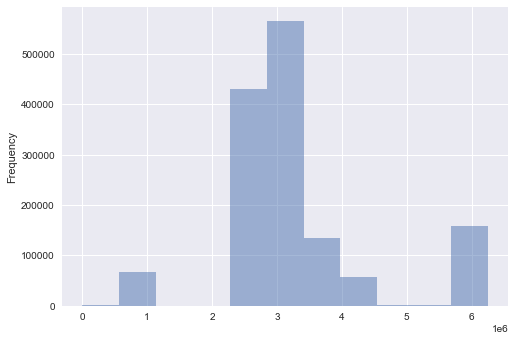

In [15]:
print(len(dfc['Unnamed: 0'].unique()))
dfc['Unnamed: 0'].plot.hist(bins=11,alpha=0.5)

1418365


<AxesSubplot:ylabel='Frequency'>

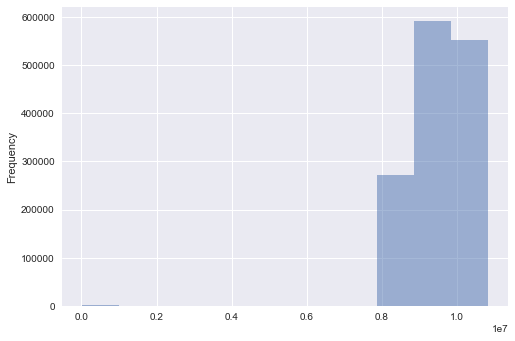

In [16]:
print(len(dfc['ID'].unique()))
dfc['ID'].plot.hist(bins=11,alpha=0.5)

In [17]:
print(len(dfc['Case Number'].unique()))
#dfc['Case Number'].plot.hist(bins=11,alpha=0.5)

1418258


### TRIA I TRACTAMENT D'ATRIBUT OBJECTIU

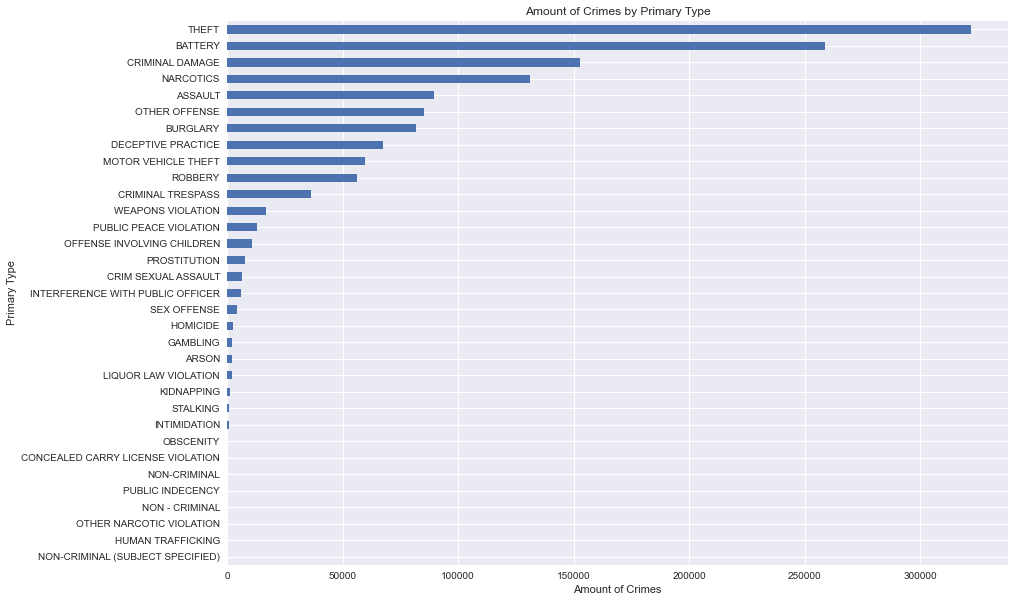

In [18]:
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

dfc.groupby([dfc['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [19]:
dfp=dfc.copy()


In [20]:
dfp=dfp.dropna()

In [21]:
df_4.shape[0]-dfp.shape[0]
#eliminem els nans, amb un dataset tan gran, 38000 mostres no són tan importants

0

In [22]:
#dfp.info()
dfType=dfp.copy()
dfType=dfType.loc[:,dfType.columns=='Primary Type']
dfType

,Primary Type
0,BATTERY
1,BATTERY
2,PUBLIC PEACE VIOLATION
3,BATTERY
4,THEFT
...,...
1456709,BATTERY
1456710,CRIMINAL DAMAGE
1456711,BATTERY
1456712,BATTERY


In [23]:
dfType.loc[(dfType['Primary Type'] != 'THEFT') & (dfType['Primary Type'] != 'BATTERY') & (dfType['Primary Type'] != 'CRIMINAL DAMAGE') & 
        (dfType['Primary Type'] != 'NARCOTICS') & (dfType['Primary Type']!= 'ASSAULT') & (dfType['Primary Type'] != 'BURGLARY')]=str('OTHER CRIME')
    

In [24]:
dfp.drop(['Primary Type'], inplace = True, axis = 1)

In [25]:
dfp = dfp.assign(Primary_Type=dfType)

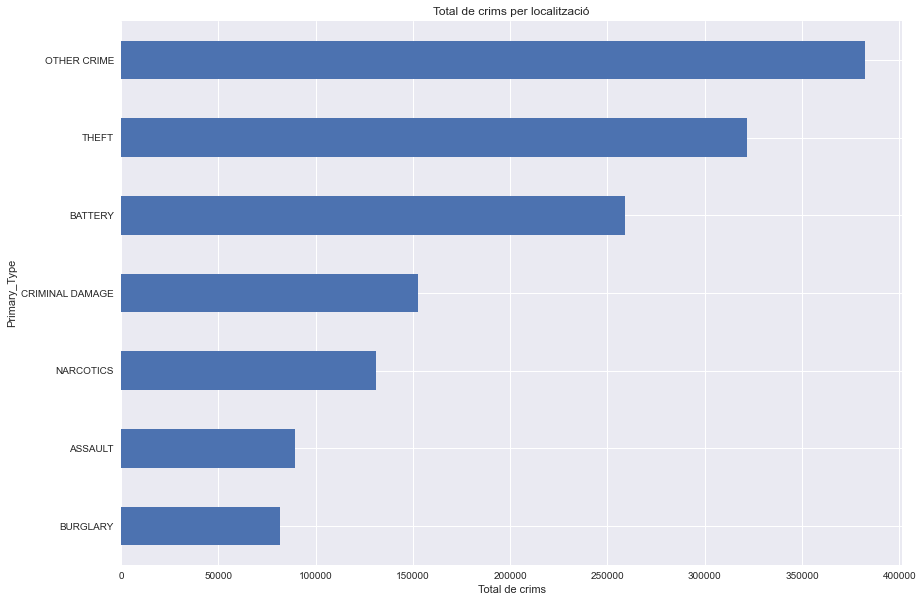

In [26]:
plt.figure(figsize=(14,10))
plt.title('Total de crims per localització')
plt.ylabel('Localització')
plt.xlabel('Total de crims')

dfp.groupby([dfp['Primary_Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [27]:
dfp.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Primary_Type
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",BATTERY
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",BATTERY
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,RECKLESS CONDUCT,STREET,False,False,...,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",OTHER CRIME
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,SIMPLE,SIDEWALK,False,False,...,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",BATTERY
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,$500 AND UNDER,RESIDENCE,False,True,...,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",THEFT


### MAPPING D'ALGUNES VARIABLES

In [28]:
loc_to_change  = list(dfp['Location Description'].value_counts()[15:].index)

dfp.loc[dfp['Location Description'].isin(loc_to_change) , dfp.columns=='Location Description'] = 'OTHER LOCATION'

In [132]:
dfmap=df_4.copy()

In [133]:
dfmap=dfmap.dropna()

In [134]:
loc_to_change  = list(dfmap['Location Description'].value_counts()[15:].index)

dfmap.loc[dfmap['Location Description'].isin(loc_to_change) , dfmap.columns=='Location Description'] = 'OTHER LOCATION'

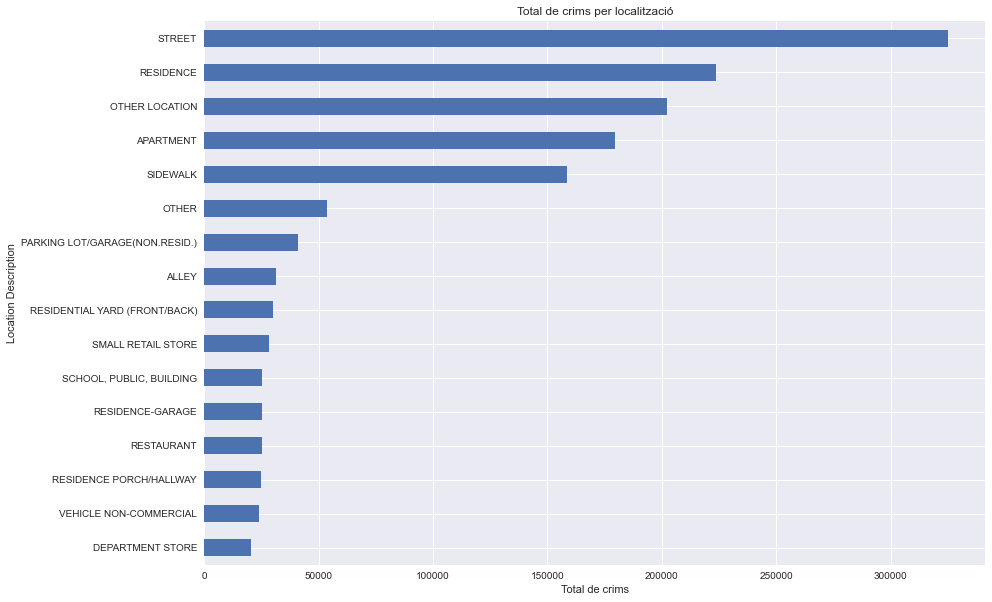

In [135]:
plt.figure(figsize=(14,10))
plt.title('Total de crims per localització')
plt.ylabel('Localització')
plt.xlabel('Total de crims')

dfmap.groupby([dfmap['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [136]:
dfmap.Date = pd.to_datetime(dfmap.Date, format='%m/%d/%Y %I:%M:%S %p')

In [137]:
dfmap.index = pd.DatetimeIndex(dfmap.Date)

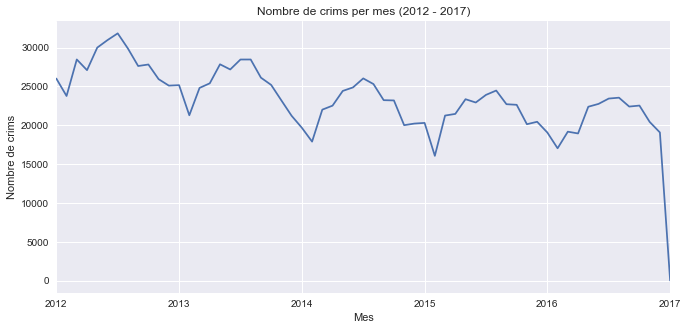

In [138]:
plt.figure(figsize=(11,5))
dfmap.resample('M').size().plot(legend=False)
plt.title('Nombre de crims per mes (2012 - 2017)')
plt.xlabel('Mes')
plt.ylabel('Nombre de crims')
plt.show()

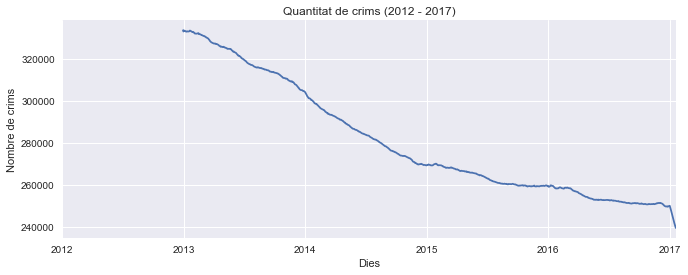

In [139]:
plt.figure(figsize=(11,4))
dfmap.resample('D').size().rolling(365).sum().plot()
plt.title('Quantitat de crims (2012 - 2017)')
plt.ylabel('Nombre de crims')
plt.xlabel('Dies')
plt.show()

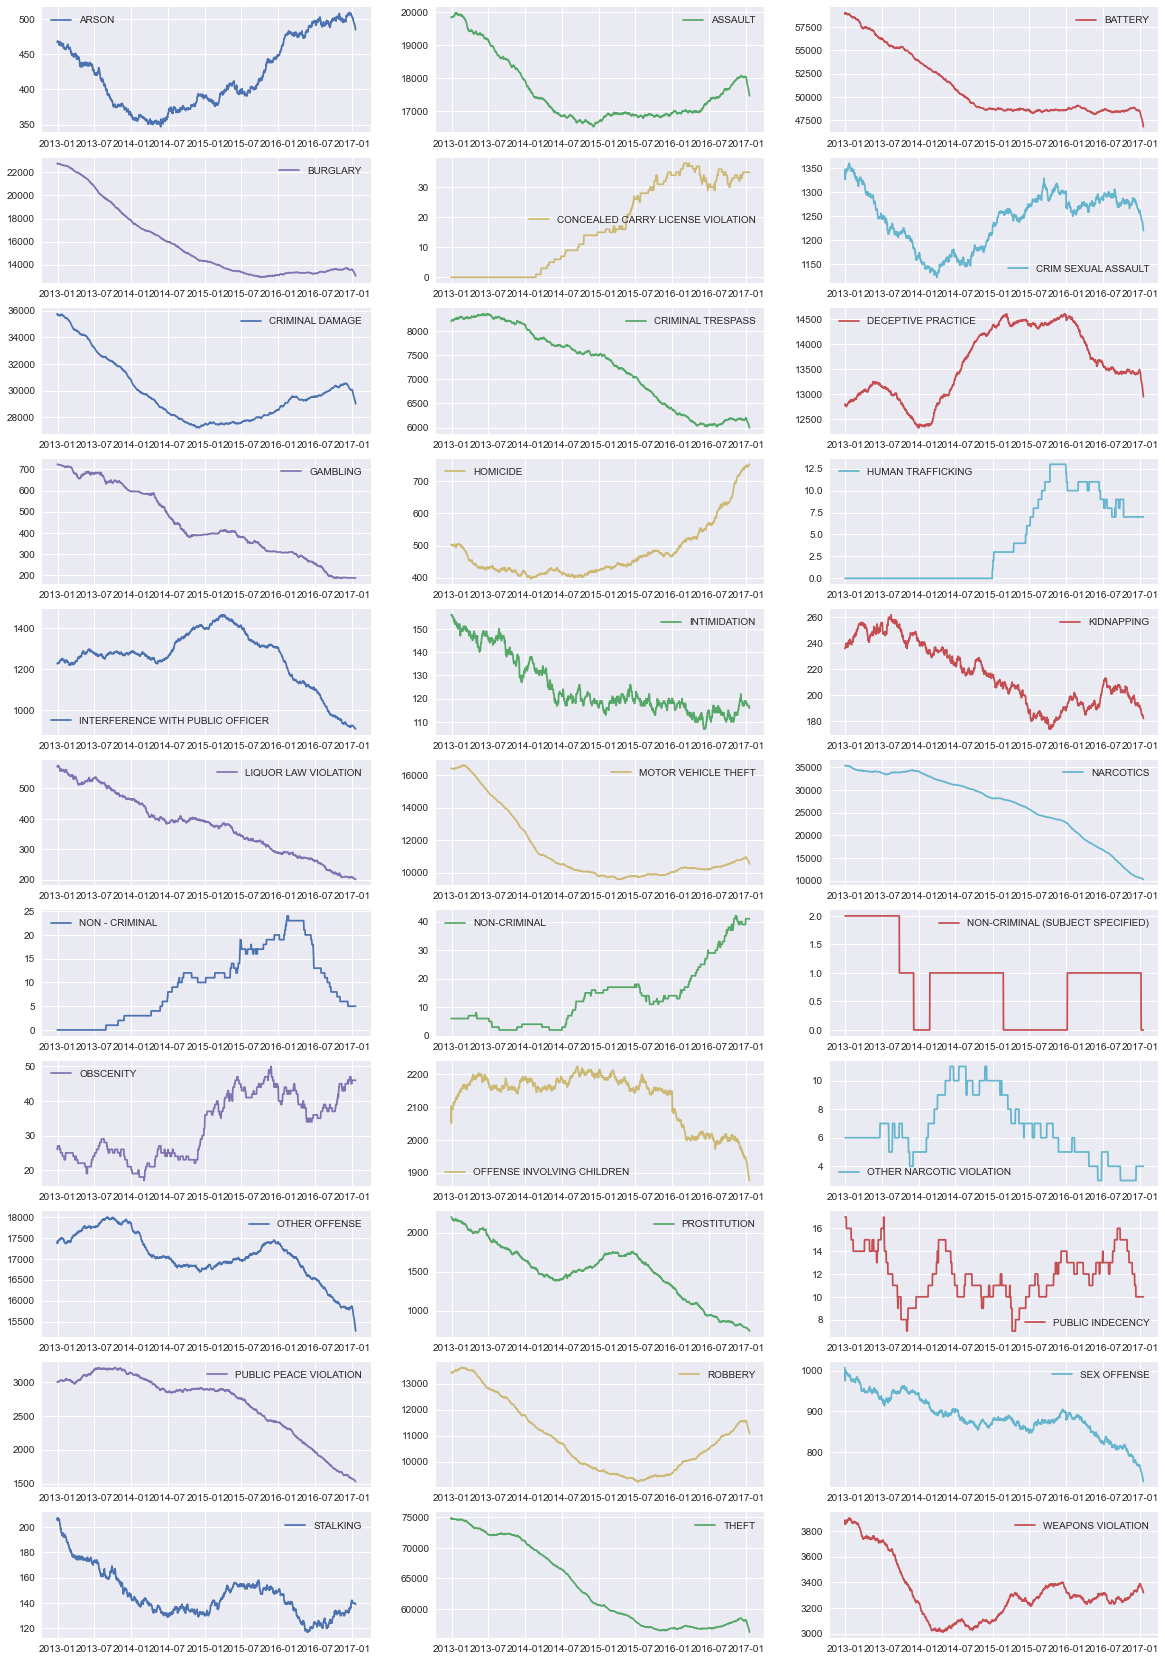

In [140]:
crimes_count_date = dfmap.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=dfmap.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(20,30 ), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

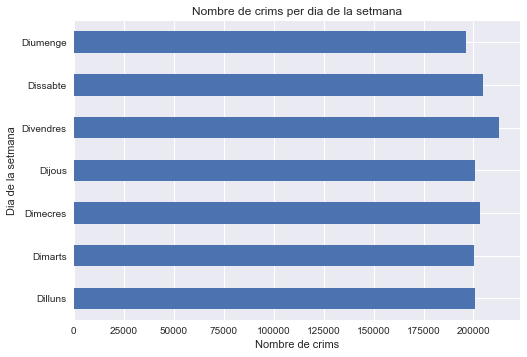

In [141]:
days = ['Dilluns','Dimarts','Dimecres',  'Dijous', 'Divendres', 'Dissabte', 'Diumenge']
dfmap.groupby([dfmap.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Dia de la setmana')
plt.yticks(np.arange(7), days)
plt.xlabel('Nombre de crims')
plt.title('Nombre de crims per dia de la setmana')
plt.show()

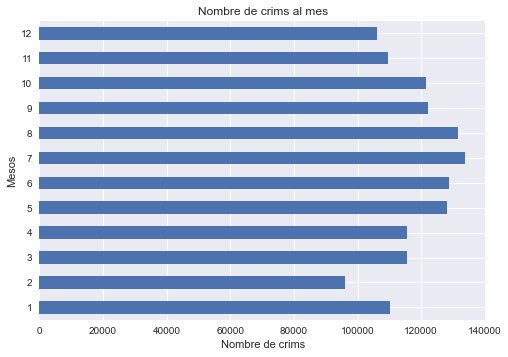

In [142]:
dfmap.groupby([dfmap.index.month]).size().plot(kind='barh')
plt.ylabel('Mesos')
plt.xlabel('Nombre de crims')
plt.title('Nombre de crims al mes')
plt.show()

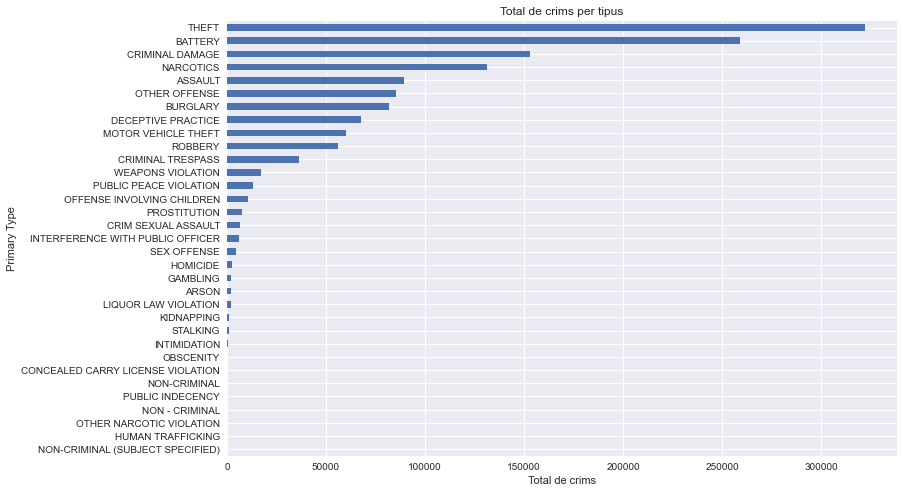

In [143]:
plt.figure(figsize=(12,8))
plt.title('Total de crims per tipus')
plt.ylabel('Tipus')
plt.xlabel('Total de crims')

dfmap.groupby([dfmap['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [144]:
from sklearn.cluster import AgglomerativeClustering as AC

def scale_df(df,axis=0):
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

def plot_hmap(df, ix=None, cmap='bwr'):
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()
    
def scale_and_plot(df, ix = None):
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.as_matrix()), np.abs(np.min(df_marginal_scaled.as_matrix()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [145]:
location_by_type  = dfmap.pivot_table(values='ID', index='Location Description',
                                       columns='Primary Type', aggfunc=np.size).fillna(0)

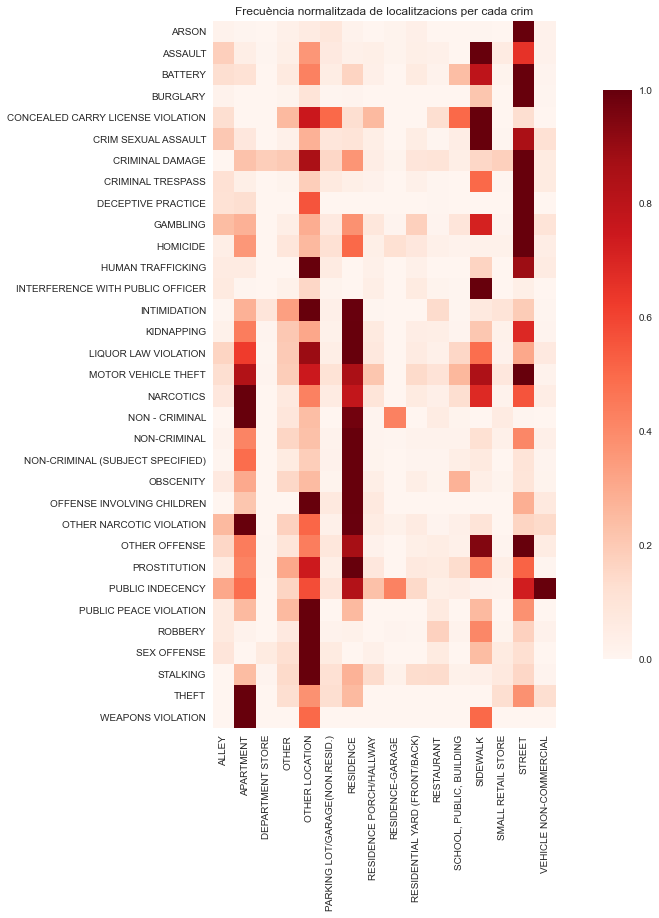

In [146]:
df = normalize(location_by_type)
ix = AC(3).fit(df.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(17,13))
plt.imshow(df.T.iloc[ix,:], cmap='Reds')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df.shape[0]), df.index, rotation='vertical')
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.title('Frecuència normalitzada de localitzacions per cada crim')
plt.grid(False)
plt.show()

In [147]:
dfType=dfmap.copy()
dfType=dfType.loc[:,dfType.columns=='Primary Type']
dfType
dfType.loc[(dfType['Primary Type'] == 'ARSON') | (dfType['Primary Type'] == 'BATTERY') | (dfType['Primary Type'] == 'CRIMINAL DAMAGE') | 
        (dfType['Primary Type'] == 'NARCOTICS') | (dfType['Primary Type']== 'CRIMINAL TRESPASS') |
           (dfType['Primary Type'] == 'BURGLARY') | (dfType['Primary Type'] == 'DECEPTIVE PRACTICE')
          | (dfType['Primary Type'] == 'GAMBLING') |(dfType['Primary Type'] == 'HOMICIDE')
          | (dfType['Primary Type'] == 'BATTERY') | (dfType['Primary Type'] == 'MOTOR VEHICLE THEFT')
          | (dfType['Primary Type'] == 'OTHER OFFENSE')]=str('STREET CRIME')

dfType.loc[(dfType['Primary Type'] == 'ASSAULT') | (dfType['Primary Type'] == 'CONCEALED CARRY LICENSE VIOLATION')|
           (dfType['Primary Type'] == 'CRIM SEXUAL ASSAULT') |
        (dfType['Primary Type'] == 'INTERFERENCE WITH PUBLIC OFFICER')]=str('SIDEWALK CRIME')

dfType.loc[(dfType['Primary Type'] == 'HUMAN TRAFFICKING') | (dfType['Primary Type'] == 'INTIMIDATION') |
           (dfType['Primary Type'] == 'OFFENSE INVOLVING CHILDREN') |
        (dfType['Primary Type'] == 'PUBLIC PEACE VIOLATION') |
          (dfType['Primary Type'] == 'ROBBERY') |
          (dfType['Primary Type'] == 'SEX OFFENSE') |
          (dfType['Primary Type'] == 'STALKING') ]=str('OTHER CRIME')

dfType.loc[(dfType['Primary Type'] == 'KIDNAPPING') | (dfType['Primary Type'] == 'LIQUOR LAW VIOLATION') |
           (dfType['Primary Type'] == 'NON-CRIMINAL') | 
        (dfType['Primary Type'] == 'NON-CRIMINAL (SUBJECT SPECIFIED)') |
          (dfType['Primary Type'] == 'OBSCENITY') |
          (dfType['Primary Type'] == 'PROSTITUTION')]=str('RESIDENCE CRIME')

dfType.loc[(dfType['Primary Type'] == 'NARCOTICS') | (dfType['Primary Type'] == 'NON - CRIMINAL') |
           (dfType['Primary Type'] == 'OTHER NARCOTIC VIOLATION') | 
        (dfType['Primary Type'] == 'THEFT') |
          (dfType['Primary Type'] == 'WEAPONS VIOLATION')]=str('APARTMENT CRIME')


dfType.loc[(dfType['Primary Type'] != 'STREET CRIME') & (dfType['Primary Type'] != 'SIDEWALK CRIME') &
           (dfType['Primary Type'] != 'OTHER CRIME') & 
        (dfType['Primary Type'] != 'RESIDENCE CRIME') &
          (dfType['Primary Type'] != 'APARTMENT CRIME')]=str('OTHER CRIME')


In [148]:
dfmap2=dfmap.copy()

In [149]:
dfmap2['Primary Type']=dfType['Primary Type']

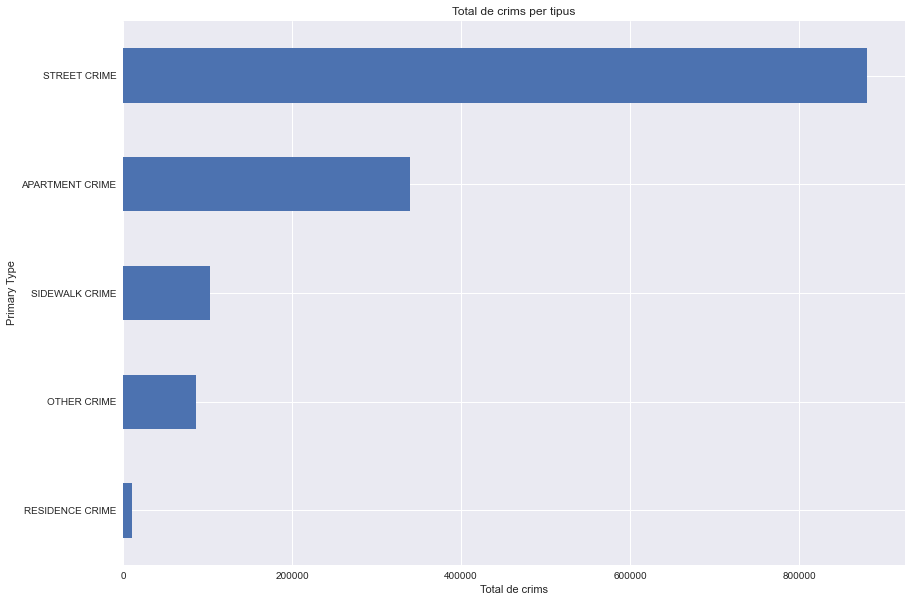

In [150]:
plt.figure(figsize=(14,10))
plt.title('Total de crims per tipus')
plt.ylabel('Tipus')
plt.xlabel('Total de crims')

dfmap2.groupby([dfmap2['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [151]:
dfmap.loc[(dfmap[['Longitude']].values < -88.0).flatten(), dfmap.columns=='Longitude'] = 0.0
dfmap.loc[(dfmap[['Longitude']].values > -87.5).flatten(), dfmap.columns=='Longitude'] = 0.0
dfmap.loc[(dfmap[['Latitude']].values < 41.60).flatten(),  dfmap.columns=='Latitude'] = 0.0
dfmap.loc[(dfmap[['Latitude']].values > 42.05).flatten(),  dfmap.columns=='Latitude'] = 0.0
dfmap.replace({'Latitude': 0.0, 'Longitude': 0.0}, np.nan, inplace=True)
dfmap.dropna(inplace=True)

In [152]:
ctypes = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 'DECEPTIVE PRACTICE',
          'MOTOR VEHICLE THEFT', 'ROBBERY', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
          'OFFENSE INVOLVING CHILDREN', 'PROSTITUTION', 'CRIM SEXUAL ASSAULT', 'INTERFERENCE WITH PUBLIC OFFICER',
          'SEX OFFENSE', 'HOMICIDE', 'ARSON', 'GAMBLING', 'LIQUOR LAW VIOLATION', 'KIDNAPPING', 'STALKING', 'INTIMIDATION']

In [153]:
Palette = ["#090364", "#d10a32"] #define your preference
sns.set_style("whitegrid")
sns.set_palette(Palette)

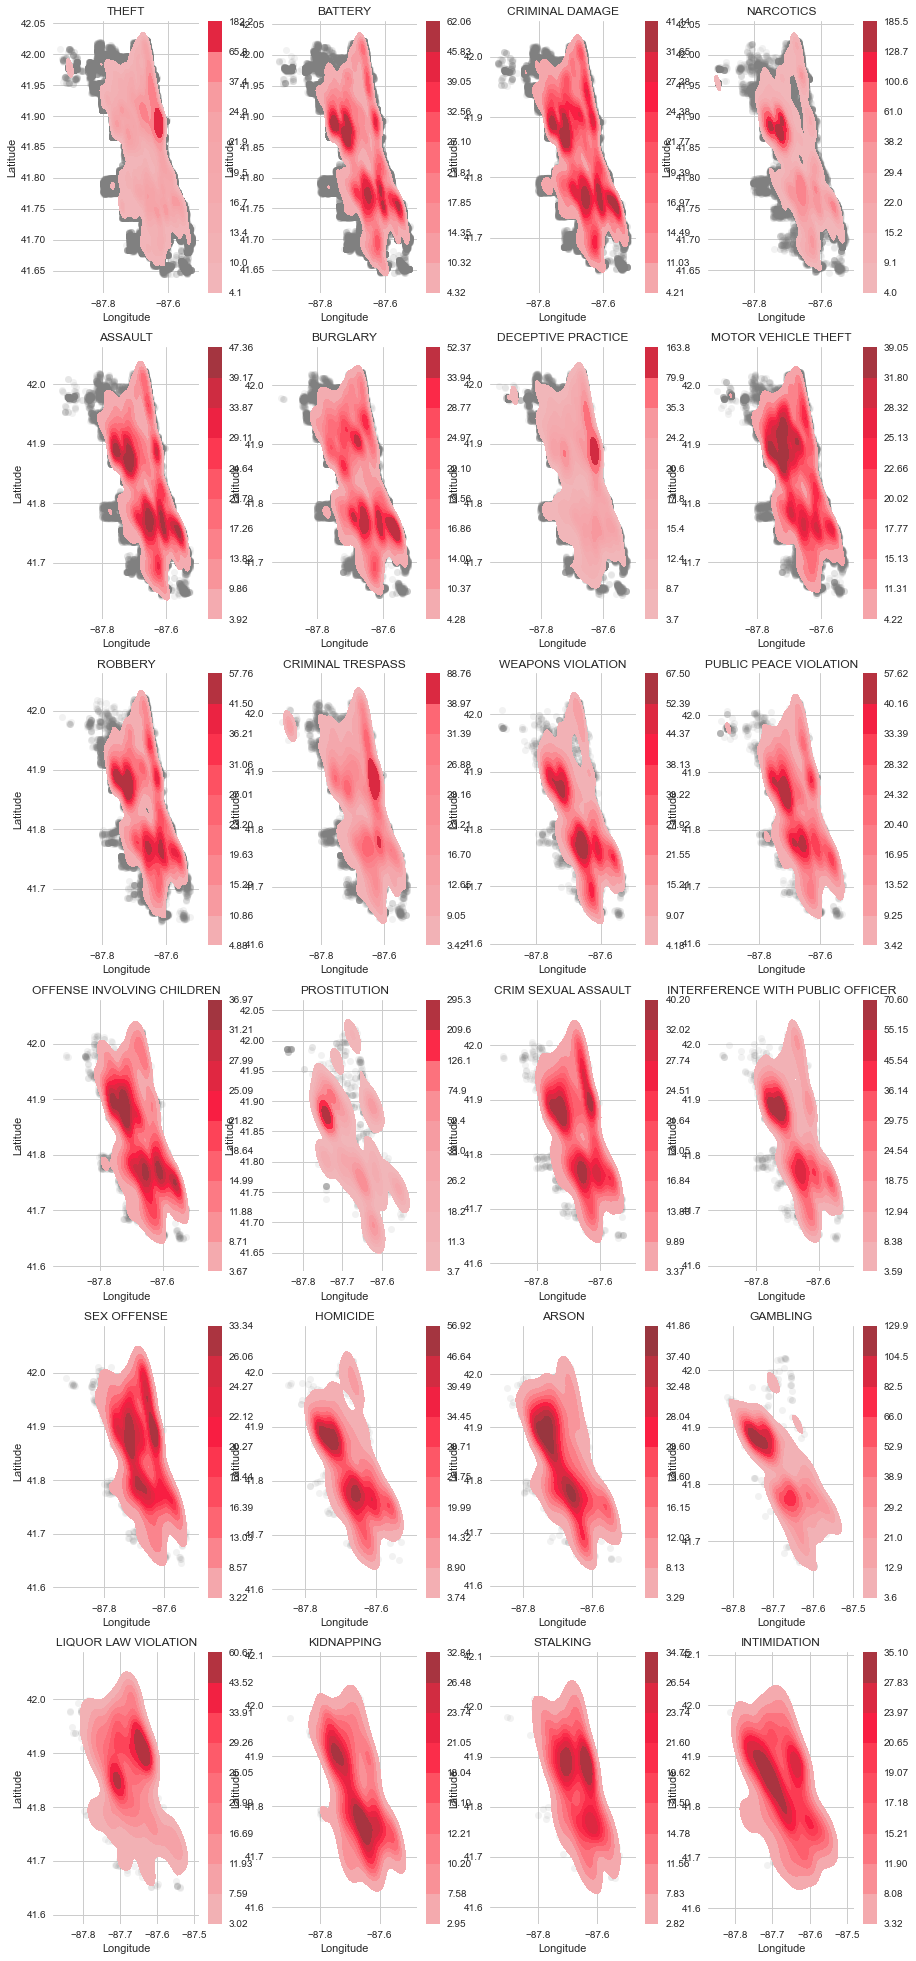

In [154]:
fig = plt.figure(figsize=(15,35))
for i, crime in enumerate(ctypes):
    ax = fig.add_subplot(int(np.ceil(float(len(ctypes)) / 4)), 4, i+1)
    dfmap_=dfmap[dfmap['Primary Type']==crime]
    sns.regplot(x='Longitude', y='Latitude',
               data= dfmap_[['Longitude','Latitude']],
               fit_reg=False,
               scatter_kws={'alpha':.1, 'color':'grey'},
               ax=ax)
    sns.kdeplot(x='Longitude', y='Latitude', shade=True,
                    #bw_adjust=.005,
                    #shade_lowest=False,
                    cbar=True, 
                    ax = ax,
                    data= dfmap_[['Longitude','Latitude']])

    ax.set_title(crime)

plt.show()

In [155]:
dfType=dfmap.copy()
dfType=dfType.loc[:,dfType.columns=='Primary Type']
dfType
dfType.loc[(dfType['Primary Type'] == 'THEFT') | (dfType['Primary Type'] == 'DECEPTIVE PRACTICE')
           | (dfType['Primary Type'] == 'STALKING') | (dfType['Primary Type'] == 'CRIMINAL TRESPASS') 
           | (dfType['Primary Type']== 'LIQUOR LAW VIOLATION')]=str('R1 CRIME')

dfType.loc[(dfType['Primary Type'] == 'BATTERY') | (dfType['Primary Type'] == 'CRIMINAL DAMAGE')|
           (dfType['Primary Type'] == 'ASSAULT') |
        (dfType['Primary Type'] == 'ROBBERY')
          | (dfType['Primary Type'] == 'OFFENSE INVOLVING CHILDREN')
          | (dfType['Primary Type'] == 'MOTOR VEHICLE THEFT')
          | (dfType['Primary Type'] == 'BURGLARY')]=str('R2 CRIME')

dfType.loc[(dfType['Primary Type'] == 'NARCOTICS') | (dfType['Primary Type'] == 'PROSTITUTION') |
           (dfType['Primary Type'] == 'INTERFERENCE WITH PUBLIC OFFICER') |
        (dfType['Primary Type'] == 'GAMBLING')]=str('R3 CRIME')

dfType.loc[(dfType['Primary Type'] == 'WEAPONS VIOLATION') | (dfType['Primary Type'] == 'PUBLIC PEACE VIOLATION') |
           (dfType['Primary Type'] == 'CRIM SEXUAL ASSAULT') | 
        (dfType['Primary Type'] == 'HOMICIDE') |
          (dfType['Primary Type'] == 'ARSON') |
          (dfType['Primary Type'] == 'INTIMIDATION')|
          (dfType['Primary Type'] == 'KIDNAPPING')|
          (dfType['Primary Type'] == 'SEX OFFENSE')]=str('R4 CRIME')


dfType.loc[(dfType['Primary Type'] != 'R1 CRIME') & (dfType['Primary Type'] != 'R2 CRIME') &
           (dfType['Primary Type'] != 'R3 CRIME') & 
        (dfType['Primary Type'] != 'R4 CRIME')]=str('NON-RELEVANT CRIME')

In [156]:
dfmap3=dfmap.copy()

In [157]:
dfmap3['Primary Type']=dfType['Primary Type']

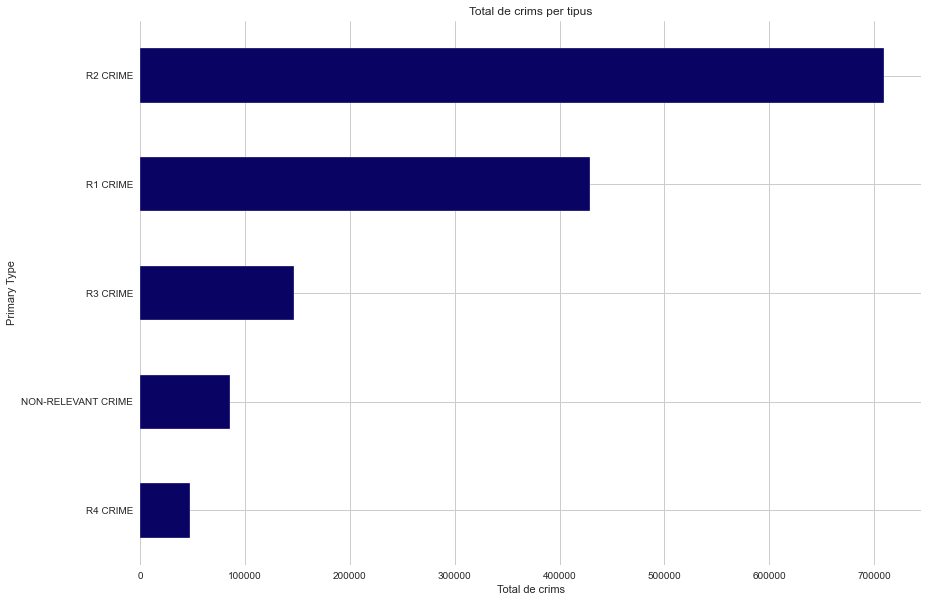

In [158]:
plt.figure(figsize=(14,10))
plt.title('Total de crims per tipus')
plt.ylabel('Tipus')
plt.xlabel('Total de crims')

dfmap3.groupby([dfmap3['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

### MODIFICACIÓ DEL ATRIBUT 'DATE'

In [29]:
dfp['date2'] = pd.to_datetime(dfp['Date'])
dfp['Year'] = dfp['date2'].dt.year
dfp['Month'] = dfp['date2'].dt.month
dfp['Day'] = dfp['date2'].dt.day
dfp['Hour'] = dfp['date2'].dt.hour
dfp['Minute'] = dfp['date2'].dt.minute
dfp['Second'] = dfp['date2'].dt.second 
dfp = dfp.drop(['Date'], axis=1) 
dfp = dfp.drop(['date2'], axis=1) 
dfp = dfp.drop(['Updated On'], axis=1)
dfp.head()

,Unnamed: 0,ID,Case Number,Block,IUCR,Description,Location Description,Arrest,Domestic,Beat,...,Year,Latitude,Longitude,Location,Primary_Type,Month,Day,Hour,Minute,Second
0,3,10508693,HZ250496,013XX S SAWYER AVE,0486,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,...,2016,41.864073,-87.706819,"(41.864073157, -87.706818608)",BATTERY,5,3,23,40,0
1,89,10508695,HZ250409,061XX S DREXEL AVE,0486,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,...,2016,41.782922,-87.604363,"(41.782921527, -87.60436317)",BATTERY,5,3,21,40,0
2,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,RECKLESS CONDUCT,STREET,False,False,1524,...,2016,41.894908,-87.758372,"(41.894908283, -87.758371958)",OTHER CRIME,5,3,23,31,0
3,673,10508698,HZ250424,049XX W FULTON ST,0460,SIMPLE,SIDEWALK,False,False,1532,...,2016,41.885687,-87.749516,"(41.885686845, -87.749515983)",BATTERY,5,3,22,10,0
4,911,10508699,HZ250455,003XX N LOTUS AVE,0820,$500 AND UNDER,RESIDENCE,False,True,1523,...,2016,41.886297,-87.761751,"(41.886297242, -87.761750709)",THEFT,5,3,22,0,0


In [30]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418365 entries, 0 to 1456713
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1418365 non-null  int64  
 1   ID                    1418365 non-null  int64  
 2   Case Number           1418365 non-null  object 
 3   Block                 1418365 non-null  object 
 4   IUCR                  1418365 non-null  object 
 5   Description           1418365 non-null  object 
 6   Location Description  1418365 non-null  object 
 7   Arrest                1418365 non-null  bool   
 8   Domestic              1418365 non-null  bool   
 9   Beat                  1418365 non-null  int64  
 10  District              1418365 non-null  float64
 11  Ward                  1418365 non-null  float64
 12  Community Area        1418365 non-null  float64
 13  FBI Code              1418365 non-null  object 
 14  X Coordinate          1418365 non-

### DROP D'ATRIBUTS CATEGORICS

In [31]:
dfp = dfp.drop(['Unnamed: 0'], axis=1)
dfp = dfp.drop(['Location'], axis=1)
dfp = dfp.drop(['IUCR'], axis=1)
dfp = dfp.drop(['Description'],axis=1)
#dfp= dfp.drop(['Location Description'], axis=1)
dfp= dfp.drop(['Block'], axis=1)
dfp= dfp.drop(['FBI Code'], axis=1)
dfp= dfp.drop(['Case Number'], axis=1)

In [32]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418365 entries, 0 to 1456713
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1418365 non-null  int64  
 1   Location Description  1418365 non-null  object 
 2   Arrest                1418365 non-null  bool   
 3   Domestic              1418365 non-null  bool   
 4   Beat                  1418365 non-null  int64  
 5   District              1418365 non-null  float64
 6   Ward                  1418365 non-null  float64
 7   Community Area        1418365 non-null  float64
 8   X Coordinate          1418365 non-null  float64
 9   Y Coordinate          1418365 non-null  float64
 10  Year                  1418365 non-null  int64  
 11  Latitude              1418365 non-null  float64
 12  Longitude             1418365 non-null  float64
 13  Primary_Type          1418365 non-null  object 
 14  Month                 1418365 non-

In [33]:
y = pd.get_dummies(dfp['Location Description'])
y['Location Description']=dfp['Location Description']
y

,ALLEY,APARTMENT,DEPARTMENT STORE,OTHER,OTHER LOCATION,PARKING LOT/GARAGE(NON.RESID.),RESIDENCE,RESIDENCE PORCH/HALLWAY,RESIDENCE-GARAGE,RESIDENTIAL YARD (FRONT/BACK),RESTAURANT,"SCHOOL, PUBLIC, BUILDING",SIDEWALK,SMALL RETAIL STORE,STREET,VEHICLE NON-COMMERCIAL,Location Description
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,APARTMENT
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,RESIDENCE
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,STREET
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,SIDEWALK
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,RESIDENCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,APARTMENT
1456710,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,APARTMENT
1456711,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,SIDEWALK
1456712,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,SIDEWALK


In [34]:
dfp

,ID,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Primary_Type,Month,Day,Hour,Minute,Second
0,10508693,APARTMENT,True,True,1022,10.0,24.0,29.0,1154907.0,1893681.0,2016,41.864073,-87.706819,BATTERY,5,3,23,40,0
1,10508695,RESIDENCE,False,True,313,3.0,20.0,42.0,1183066.0,1864330.0,2016,41.782922,-87.604363,BATTERY,5,3,21,40,0
2,10508697,STREET,False,False,1524,15.0,37.0,25.0,1140789.0,1904819.0,2016,41.894908,-87.758372,OTHER CRIME,5,3,23,31,0
3,10508698,SIDEWALK,False,False,1532,15.0,28.0,25.0,1143223.0,1901475.0,2016,41.885687,-87.749516,BATTERY,5,3,22,10,0
4,10508699,RESIDENCE,False,True,1523,15.0,28.0,25.0,1139890.0,1901675.0,2016,41.886297,-87.761751,THEFT,5,3,22,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,10508679,APARTMENT,True,True,1034,10.0,28.0,30.0,1159105.0,1888300.0,2016,41.849222,-87.691556,BATTERY,5,3,23,33,0
1456710,10508680,APARTMENT,True,True,731,7.0,17.0,69.0,1175230.0,1856183.0,2016,41.760744,-87.633335,CRIMINAL DAMAGE,5,3,23,30,0
1456711,10508681,SIDEWALK,False,False,825,8.0,15.0,66.0,1161027.0,1862810.0,2016,41.779235,-87.685207,BATTERY,5,3,0,15,0
1456712,10508690,SIDEWALK,False,True,423,4.0,7.0,46.0,1197261.0,1850727.0,2016,41.745252,-87.552773,BATTERY,5,3,21,7,0


In [35]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418365 entries, 0 to 1456713
Data columns (total 17 columns):
 #   Column                          Non-Null Count    Dtype 
---  ------                          --------------    ----- 
 0   ALLEY                           1418365 non-null  uint8 
 1   APARTMENT                       1418365 non-null  uint8 
 2   DEPARTMENT STORE                1418365 non-null  uint8 
 3   OTHER                           1418365 non-null  uint8 
 4   OTHER LOCATION                  1418365 non-null  uint8 
 5   PARKING LOT/GARAGE(NON.RESID.)  1418365 non-null  uint8 
 6   RESIDENCE                       1418365 non-null  uint8 
 7   RESIDENCE PORCH/HALLWAY         1418365 non-null  uint8 
 8   RESIDENCE-GARAGE                1418365 non-null  uint8 
 9   RESIDENTIAL YARD (FRONT/BACK)   1418365 non-null  uint8 
 10  RESTAURANT                      1418365 non-null  uint8 
 11  SCHOOL, PUBLIC, BUILDING        1418365 non-null  uint8 
 12  SIDEWALK      

In [36]:
dfnoloc=dfp.copy()

In [37]:
dfp['ALLEY']= y['ALLEY']
dfp['APARTMENT']= y['APARTMENT']
dfp['DEPARTMENT STORE']= y['DEPARTMENT STORE']
dfp['OTHER']= y['OTHER']
dfp['OTHER LOCATION']= y['OTHER LOCATION']
dfp['PARKING LOT/GARAGE(NON.RESID.)']= y['PARKING LOT/GARAGE(NON.RESID.)']
dfp['RESIDENCE']= y['RESIDENCE']
dfp['RESIDENCE PORCH/HALLWAY']= y['RESIDENCE PORCH/HALLWAY']
dfp['RESIDENCE-GARAGE']= y['RESIDENCE-GARAGE']
dfp['RESIDENTIAL YARD (FRONT/BACK)']= y['RESIDENTIAL YARD (FRONT/BACK)']
dfp['RESTAURANT']= y['RESTAURANT']
dfp['SCHOOL, PUBLIC, BUILDING']= y['SCHOOL, PUBLIC, BUILDING']
dfp['SIDEWALK']= y['SIDEWALK']
dfp['SMALL RETAIL STORE']= y['SMALL RETAIL STORE']
dfp['STREET']= y['STREET']
dfp['VEHICLE NON-COMMERCIAL']= y['VEHICLE NON-COMMERCIAL']

In [38]:
dfp= dfp.drop(['Location Description'], axis=1)
dfnoloc= dfnoloc.drop(['Location Description'], axis=1)

In [39]:
dfp2=dfp.copy()

In [40]:
dfp2['Primary Type']=df_4['Primary Type']
dfp2=dfp2.drop(['Primary_Type'], axis=1)

In [41]:
dfType=dfp2.copy()
dfType=dfType.loc[:,dfType.columns=='Primary Type']
dfType
dfType.loc[(dfType['Primary Type'] == 'ARSON') | (dfType['Primary Type'] == 'BATTERY') | (dfType['Primary Type'] == 'CRIMINAL DAMAGE') | 
        (dfType['Primary Type'] == 'NARCOTICS') | (dfType['Primary Type']== 'CRIMINAL TRESPASS') |
           (dfType['Primary Type'] == 'BURGLARY') | (dfType['Primary Type'] == 'DECEPTIVE PRACTICE')
          | (dfType['Primary Type'] == 'GAMBLING') |(dfType['Primary Type'] == 'HOMICIDE')
          | (dfType['Primary Type'] == 'BATTERY') | (dfType['Primary Type'] == 'MOTOR VEHICLE THEFT')
          | (dfType['Primary Type'] == 'OTHER OFFENSE')]=str('STREET CRIME')

dfType.loc[(dfType['Primary Type'] == 'ASSAULT') | (dfType['Primary Type'] == 'CONCEALED CARRY LICENSE VIOLATION')|
           (dfType['Primary Type'] == 'CRIM SEXUAL ASSAULT') |
        (dfType['Primary Type'] == 'INTERFERENCE WITH PUBLIC OFFICER')]=str('SIDEWALK CRIME')

dfType.loc[(dfType['Primary Type'] == 'HUMAN TRAFFICKING') | (dfType['Primary Type'] == 'INTIMIDATION') |
           (dfType['Primary Type'] == 'OFFENSE INVOLVING CHILDREN') |
        (dfType['Primary Type'] == 'PUBLIC PEACE VIOLATION') |
          (dfType['Primary Type'] == 'ROBBERY') |
          (dfType['Primary Type'] == 'SEX OFFENSE') |
          (dfType['Primary Type'] == 'STALKING') ]=str('OTHER CRIME')

dfType.loc[(dfType['Primary Type'] == 'KIDNAPPING') | (dfType['Primary Type'] == 'LIQUOR LAW VIOLATION') |
           (dfType['Primary Type'] == 'NON-CRIMINAL') | 
        (dfType['Primary Type'] == 'NON-CRIMINAL (SUBJECT SPECIFIED)') |
          (dfType['Primary Type'] == 'OBSCENITY') |
          (dfType['Primary Type'] == 'PROSTITUTION')]=str('RESIDENCE CRIME')

dfType.loc[(dfType['Primary Type'] == 'NARCOTICS') | (dfType['Primary Type'] == 'NON - CRIMINAL') |
           (dfType['Primary Type'] == 'OTHER NARCOTIC VIOLATION') | 
        (dfType['Primary Type'] == 'THEFT') |
          (dfType['Primary Type'] == 'WEAPONS VIOLATION')]=str('APARTMENT CRIME')


dfType.loc[(dfType['Primary Type'] != 'STREET CRIME') & (dfType['Primary Type'] != 'SIDEWALK CRIME') &
           (dfType['Primary Type'] != 'OTHER CRIME') & 
        (dfType['Primary Type'] != 'RESIDENCE CRIME') &
          (dfType['Primary Type'] != 'APARTMENT CRIME')]=str('OTHER CRIME')


In [42]:
dfp2['Primary Type']=dfType['Primary Type']

In [43]:
dfp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418365 entries, 0 to 1456713
Data columns (total 34 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   ID                              1418365 non-null  int64  
 1   Arrest                          1418365 non-null  bool   
 2   Domestic                        1418365 non-null  bool   
 3   Beat                            1418365 non-null  int64  
 4   District                        1418365 non-null  float64
 5   Ward                            1418365 non-null  float64
 6   Community Area                  1418365 non-null  float64
 7   X Coordinate                    1418365 non-null  float64
 8   Y Coordinate                    1418365 non-null  float64
 9   Year                            1418365 non-null  int64  
 10  Latitude                        1418365 non-null  float64
 11  Longitude                       1418365 non-null  float64
 12  

In [44]:
dfp3=dfp.copy()

In [45]:
dfp3['Primary Type']=df_4['Primary Type']
dfp3=dfp3.drop(['Primary_Type'], axis=1)

In [46]:
dfType=dfp3.copy()
dfType=dfType.loc[:,dfType.columns=='Primary Type']
dfType
dfType.loc[(dfType['Primary Type'] == 'THEFT') | (dfType['Primary Type'] == 'DECEPTIVE PRACTICE')
           | (dfType['Primary Type'] == 'STALKING') | (dfType['Primary Type'] == 'CRIMINAL TRESPASS') 
           | (dfType['Primary Type']== 'LIQUOR LAW VIOLATION')]=str('R1 CRIME')

dfType.loc[(dfType['Primary Type'] == 'BATTERY') | (dfType['Primary Type'] == 'CRIMINAL DAMAGE')|
           (dfType['Primary Type'] == 'ASSAULT') |
        (dfType['Primary Type'] == 'ROBBERY')
          | (dfType['Primary Type'] == 'OFFENSE INVOLVING CHILDREN')
          | (dfType['Primary Type'] == 'MOTOR VEHICLE THEFT')
          | (dfType['Primary Type'] == 'BURGLARY')]=str('R2 CRIME')

dfType.loc[(dfType['Primary Type'] == 'NARCOTICS') | (dfType['Primary Type'] == 'PROSTITUTION') |
           (dfType['Primary Type'] == 'INTERFERENCE WITH PUBLIC OFFICER') |
        (dfType['Primary Type'] == 'GAMBLING')]=str('R3 CRIME')

dfType.loc[(dfType['Primary Type'] == 'WEAPONS VIOLATION') | (dfType['Primary Type'] == 'PUBLIC PEACE VIOLATION') |
           (dfType['Primary Type'] == 'CRIM SEXUAL ASSAULT') | 
        (dfType['Primary Type'] == 'HOMICIDE') |
          (dfType['Primary Type'] == 'ARSON') |
          (dfType['Primary Type'] == 'INTIMIDATION')|
          (dfType['Primary Type'] == 'KIDNAPPING')|
          (dfType['Primary Type'] == 'SEX OFFENSE')]=str('R4 CRIME')


dfType.loc[(dfType['Primary Type'] != 'R1 CRIME') & (dfType['Primary Type'] != 'R2 CRIME') &
           (dfType['Primary Type'] != 'R3 CRIME') & 
        (dfType['Primary Type'] != 'R4 CRIME')]=str('NON-RELEVANT CRIME')

In [47]:
dfp3['Primary Type']=dfType['Primary Type']

### PRIMERES REGRESSIONS

In [199]:
y=pd.factorize(dfp["Primary_Type"])[0] 
y2=pd.factorize(dfp2["Primary Type"])[0] 
y3=pd.factorize(dfp3["Primary Type"])[0] 

In [49]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418365 entries, 0 to 1456713
Data columns (total 34 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   ID                              1418365 non-null  int64  
 1   Arrest                          1418365 non-null  bool   
 2   Domestic                        1418365 non-null  bool   
 3   Beat                            1418365 non-null  int64  
 4   District                        1418365 non-null  float64
 5   Ward                            1418365 non-null  float64
 6   Community Area                  1418365 non-null  float64
 7   X Coordinate                    1418365 non-null  float64
 8   Y Coordinate                    1418365 non-null  float64
 9   Year                            1418365 non-null  int64  
 10  Latitude                        1418365 non-null  float64
 11  Longitude                       1418365 non-null  float64
 12  

In [50]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [51]:
np.unique(y2)

array([0, 1, 2, 3, 4], dtype=int64)

In [52]:
np.unique(y3)

array([0, 1, 2, 3, 4], dtype=int64)

In [53]:
np.unique(dfp3["Primary Type"])

array(['NON-RELEVANT CRIME', 'R1 CRIME', 'R2 CRIME', 'R3 CRIME',
       'R4 CRIME'], dtype=object)

In [54]:
X=dfp.loc[ : ,dfp.columns!='Primary_Type']
XT=dfnoloc.loc[ : ,dfnoloc.columns!='Primary_Type']


In [55]:
X_t=StandardScaler().fit_transform(X)
X_tT=StandardScaler().fit_transform(XT)

In [56]:
X_t

array([[ 1.16588828,  1.68002945,  2.3649392 , ..., -0.14244988,
        -0.54529548, -0.13118391],
       [ 1.16589077, -0.59522766,  2.3649392 , ..., -0.14244988,
        -0.54529548, -0.13118391],
       [ 1.16589327, -0.59522766, -0.42284385, ..., -0.14244988,
         1.83386813, -0.13118391],
       ...,
       [ 1.1658733 , -0.59522766, -0.42284385, ..., -0.14244988,
        -0.54529548, -0.13118391],
       [ 1.16588453, -0.59522766,  2.3649392 , ..., -0.14244988,
        -0.54529548, -0.13118391],
       [ 1.16588703,  1.68002945, -0.42284385, ..., -0.14244988,
        -0.54529548, -0.13118391]])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.2,stratify=y, random_state=43)
X_trainL, X_testL, y_trainL, y_testL = train_test_split(X_tT, y, test_size=0.2,stratify=y, random_state=43)
X_tr, X_te, y_tr, y_te = train_test_split(X_t, y2, test_size=0.2,stratify=y2, random_state=43)
X_tr3, X_te3, y_tr3, y_te3 = train_test_split(X_t, y3, test_size=0.2,stratify=y3, random_state=43)

In [70]:
rf_model = RandomForestClassifier(n_estimators=60, # Number of trees 
                                  max_depth = 15)

# Model Training
rf_model.fit(X=X_train,
             y=y_train)

# Prediction
result = rf_model.predict(X_test)

========== Random Forest Results ==========
Accuracy    :  0.4807859754012543
Recall      :  0.4807859754012543
Precision   :  0.4873844361926516
F1 Score    :  0.4807859754012543
Confusion Matrix: 


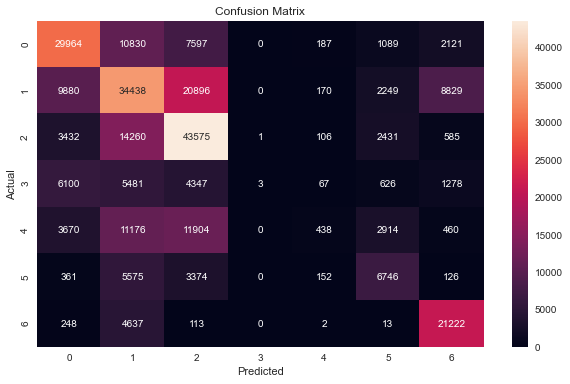

In [71]:
ac_sc = accuracy_score(y_test, result)
rc_sc = recall_score(y_test, result, average="weighted")
pr_sc = precision_score(y_test, result, average="weighted")
f1_sc = f1_score(y_test, result, average='micro')
confusion_m = confusion_matrix(y_test, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
visualize_confusion_matrix(result, y_test)

========== Random Forest Results ==========
Accuracy    :  0.5083626217511007
Recall      :  0.5083626217511007
Precision   :  0.5528722877680939
F1 Score    :  0.5083626217511007
Confusion Matrix: 


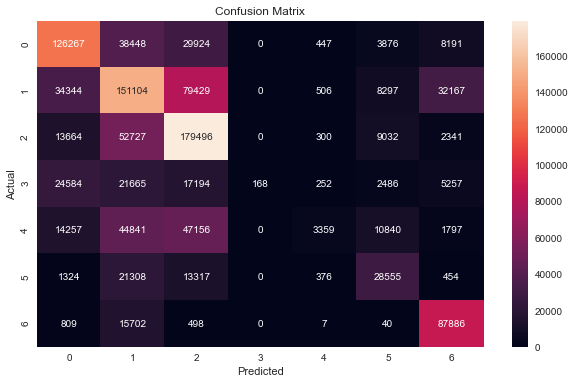

In [72]:
result = rf_model.predict(X_train)
ac_sc = accuracy_score(y_train, result)
rc_sc = recall_score(y_train, result, average="weighted")
pr_sc = precision_score(y_train, result, average="weighted")
f1_sc = f1_score(y_train, result, average='micro')
confusion_m = confusion_matrix(y_train, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
visualize_confusion_matrix(result, y_train)

In [82]:
rf_model = RandomForestClassifier(n_estimators=60, # Number of trees 
                                  max_depth = 15)

# Model Training
rf_model.fit(X=X_tr,
             y=y_tr)

# Prediction
result = rf_model.predict(X_te)

========== Random Forest Results ==========
Accuracy    :  0.6755137076845523
Recall      :  0.6755137076845523
Precision   :  0.6334957929911516
F1 Score    :  0.6755137076845523
Confusion Matrix: 


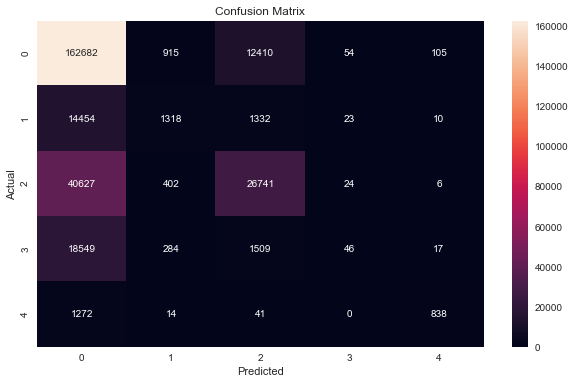

In [83]:
ac_sc = accuracy_score(y_te, result)
rc_sc = recall_score(y_te, result, average="weighted")
pr_sc = precision_score(y_te, result, average="weighted")
f1_sc = f1_score(y_te, result, average='micro')
confusion_m = confusion_matrix(y_te, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
visualize_confusion_matrix(result, y_te)

========== Random Forest Results ==========
Accuracy    :  0.8058927003979934
Recall      :  0.8058927003979934
Precision   :  0.8354907509918632
F1 Score    :  0.8058927003979934
Confusion Matrix: 


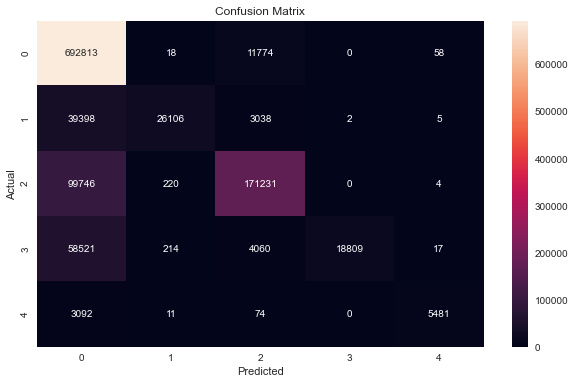

In [84]:
result = rf_model.predict(X_tr)
ac_sc = accuracy_score(y_tr, result)
rc_sc = recall_score(y_tr, result, average="weighted")
pr_sc = precision_score(y_tr, result, average="weighted")
f1_sc = f1_score(y_tr, result, average='micro')
confusion_m = confusion_matrix(y_tr, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
visualize_confusion_matrix(result, y_tr)

In [73]:
rf_model = RandomForestClassifier(n_estimators=60, # Number of trees 
                                  max_depth = 15)

# Model Training
rf_model.fit(X=X_trainL,
             y=y_trainL)

# Prediction
result = rf_model.predict(X_testL)

========== Random Forest Results ==========
Accuracy    :  0.4418079972362544
Recall      :  0.4418079972362544
Precision   :  0.460145212555455
F1 Score    :  0.4418079972362544
Confusion Matrix: 


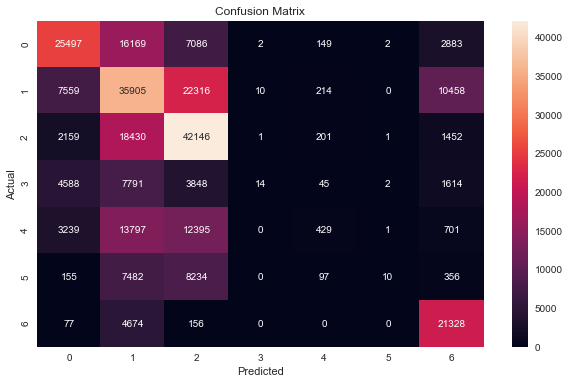

In [74]:
ac_sc = accuracy_score(y_testL, result)
rc_sc = recall_score(y_testL, result, average="weighted")
pr_sc = precision_score(y_testL, result, average="weighted")
f1_sc = f1_score(y_testL, result, average='micro')
confusion_m = confusion_matrix(y_testL, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
visualize_confusion_matrix(result, y_testL)

========== Random Forest Results ==========
Accuracy    :  0.4727855664797143
Recall      :  0.4727855664797143
Precision   :  0.5556899311546771
F1 Score    :  0.47278556647971426
Confusion Matrix: 


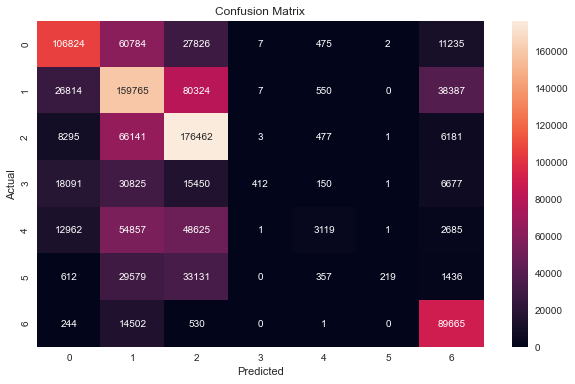

In [75]:
result = rf_model.predict(X_trainL)
ac_sc = accuracy_score(y_trainL, result)
rc_sc = recall_score(y_trainL, result, average="weighted")
pr_sc = precision_score(y_trainL, result, average="weighted")
f1_sc = f1_score(y_trainL, result, average='micro')
confusion_m = confusion_matrix(y_trainL, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
visualize_confusion_matrix(result, y_trainL)

In [181]:
knn_model = KNeighborsClassifier(n_neighbors=15)

# Model Training
knn_model.fit(X=X_train,
             y=y_train)

# Prediction
ac_sc = accuracy_score(y_test, result)
rc_sc = recall_score(y_test, result, average="weighted")
pr_sc = precision_score(y_test, result, average="weighted")
f1_sc = f1_score(y_test, result, average='micro')
confusion_m = confusion_matrix(y_test, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Random Forest Results ==========
Accuracy    :  0.4400630303201221
Recall      :  0.4400630303201221
Precision   :  0.45465230029598414
F1 Score    :  0.44006303032012206
Confusion Matrix: 
[[25475 16259  7035     4   177     2  2836]
 [ 7588 35887 22137    12   329     4 10505]
 [ 2203 18774 41654     2   276     4  1477]
 [ 4597  7776  3819    21    59     1  1629]
 [ 3273 13805 12240     0   537     2   705]
 [  159  7523  8157     0   124    17   354]
 [  100  4709   183     0     0     0 21243]]


In [88]:
rf_model = RandomForestClassifier(n_estimators=60, # Number of trees 
                                  max_depth = 15)

# Model Training
rf_model.fit(X=X_tr3,
             y=y_tr3)

# Prediction
result = rf_model.predict(X_te3)

========== Random Forest Results ==========
Accuracy    :  0.6597208757971326
Recall      :  0.6597208757971326
Precision   :  0.6722218329807691
F1 Score    :  0.6597208757971326
Confusion Matrix: 


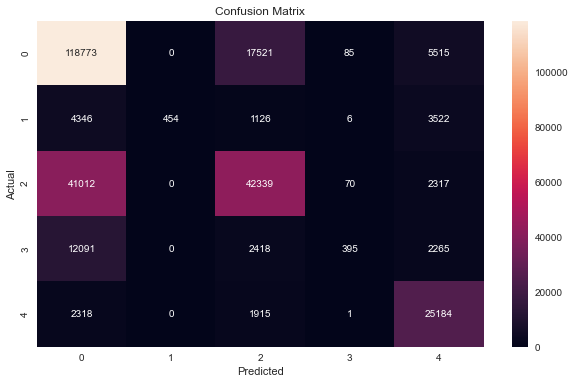

In [89]:
ac_sc = accuracy_score(y_te3, result)
rc_sc = recall_score(y_te3, result, average="weighted")
pr_sc = precision_score(y_te3, result, average="weighted")
f1_sc = f1_score(y_te3, result, average='micro')

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
visualize_confusion_matrix(result, y_te3)

========== Random Forest Results ==========
Accuracy    :  0.6742737236183916
Recall      :  0.6742737236183916
Precision   :  0.6960409921845648
F1 Score    :  0.6742737236183916
Confusion Matrix: 


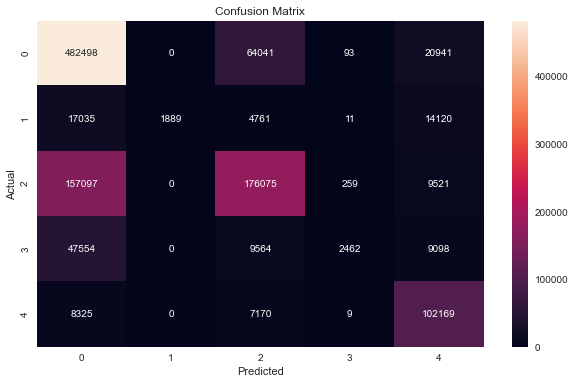

In [90]:
result = rf_model.predict(X_tr3)
ac_sc = accuracy_score(y_tr3, result)
rc_sc = recall_score(y_tr3, result, average="weighted")
pr_sc = precision_score(y_tr3, result, average="weighted")
f1_sc = f1_score(y_tr3, result, average='micro')

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
visualize_confusion_matrix(result, y_tr3)

In [108]:
from catboost import Pool,CatBoostClassifier

In [117]:
yboost=dfp.loc[:,dfp.columns=="Primary_Type"]
yboost3=dfp3.loc[:,dfp3.columns=="Primary Type"]
Xboost=dfp.loc[:,dfp.columns!="Primary_Type"]
Xboost3=dfp3.loc[:,dfp3.columns!="Primary Type"]

In [118]:
Xb=StandardScaler().fit_transform(Xboost)
Xb3=StandardScaler().fit_transform(Xboost3)

In [119]:
model = CatBoostClassifier(iterations=65,
                           learning_rate=0.1,
                           depth=10,
                          loss_function='MultiClass')

In [121]:
train_data, eval_data, train_labels, eval_label = train_test_split(Xb, yboost, test_size=0.2,stratify=y, random_state=43)
train_data3, eval_data3, train_labels3, eval_label3 = train_test_split(Xb3, yboost3, test_size=0.2,stratify=y3, random_state=43)

In [124]:
model.fit(train_data, train_labels)
preds_class = model.predict(eval_data)
preds_proba = model.predict_proba(eval_data)
preds_raw = model.predict(eval_data, prediction_type='RawFormulaVal')

0:	learn: 1.8339864	total: 1.74s	remaining: 1m 51s
1:	learn: 1.7562951	total: 3.35s	remaining: 1m 45s
2:	learn: 1.6948124	total: 4.94s	remaining: 1m 42s
3:	learn: 1.6470005	total: 6.53s	remaining: 1m 39s
4:	learn: 1.6074605	total: 8.23s	remaining: 1m 38s
5:	learn: 1.5748460	total: 9.91s	remaining: 1m 37s
6:	learn: 1.5447149	total: 11.5s	remaining: 1m 35s
7:	learn: 1.5204223	total: 13.1s	remaining: 1m 33s
8:	learn: 1.4999584	total: 14.7s	remaining: 1m 31s
9:	learn: 1.4812680	total: 16.3s	remaining: 1m 29s
10:	learn: 1.4649954	total: 17.9s	remaining: 1m 27s
11:	learn: 1.4510752	total: 19.5s	remaining: 1m 26s
12:	learn: 1.4387877	total: 21.2s	remaining: 1m 24s
13:	learn: 1.4277085	total: 22.9s	remaining: 1m 23s
14:	learn: 1.4180621	total: 24.6s	remaining: 1m 22s
15:	learn: 1.4095165	total: 26.3s	remaining: 1m 20s
16:	learn: 1.4028497	total: 28.1s	remaining: 1m 19s
17:	learn: 1.3961036	total: 29.9s	remaining: 1m 18s
18:	learn: 1.3897401	total: 31.6s	remaining: 1m 16s
19:	learn: 1.3835149	t

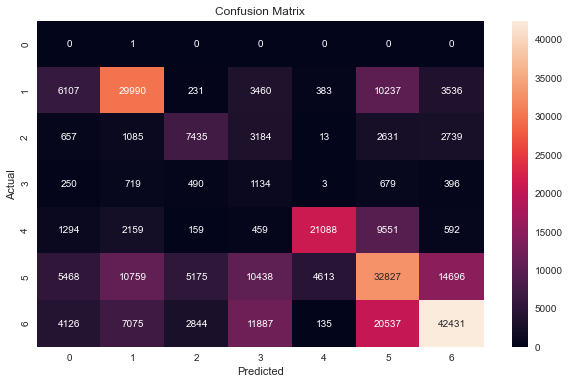

0.47556517539561394


In [125]:
ac_sc = accuracy_score(eval_label, preds_class)

visualize_confusion_matrix(eval_label, preds_class)

print(ac_sc)

In [122]:
model.fit(train_data3, train_labels3)
preds_class = model.predict(eval_data3)
preds_proba = model.predict_proba(eval_data3)
preds_raw = model.predict(eval_data3, prediction_type='RawFormulaVal')

0:	learn: 1.4688133	total: 1.23s	remaining: 1m 18s
1:	learn: 1.3660160	total: 2.39s	remaining: 1m 15s
2:	learn: 1.2876977	total: 3.52s	remaining: 1m 12s
3:	learn: 1.2246895	total: 4.65s	remaining: 1m 10s
4:	learn: 1.1737356	total: 5.82s	remaining: 1m 9s
5:	learn: 1.1317655	total: 7.05s	remaining: 1m 9s
6:	learn: 1.0964761	total: 8.28s	remaining: 1m 8s
7:	learn: 1.0667816	total: 9.46s	remaining: 1m 7s
8:	learn: 1.0408240	total: 10.6s	remaining: 1m 5s
9:	learn: 1.0179195	total: 11.7s	remaining: 1m 4s
10:	learn: 0.9987273	total: 12.9s	remaining: 1m 3s
11:	learn: 0.9822616	total: 14.1s	remaining: 1m 2s
12:	learn: 0.9679684	total: 15.2s	remaining: 1m
13:	learn: 0.9546515	total: 16.6s	remaining: 1m
14:	learn: 0.9430593	total: 18.3s	remaining: 1m
15:	learn: 0.9326948	total: 19.8s	remaining: 1m
16:	learn: 0.9239726	total: 21.7s	remaining: 1m 1s
17:	learn: 0.9162256	total: 23.4s	remaining: 1m
18:	learn: 0.9091881	total: 24.8s	remaining: 1m
19:	learn: 0.9032614	total: 26s	remaining: 58.5s
20:	le

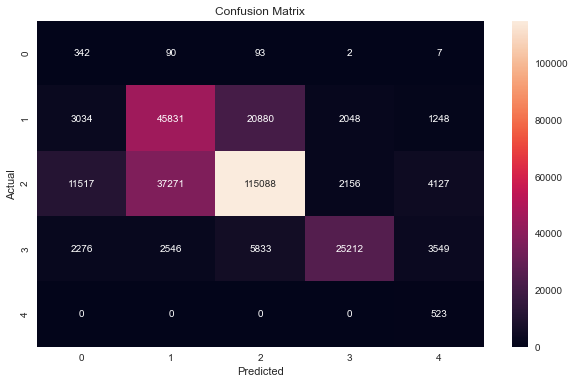

0.6591956231294483


In [123]:
ac_sc = accuracy_score(eval_label3, preds_class)

visualize_confusion_matrix(eval_label3, preds_class)

print(ac_sc)



### FEATURE SELECTION

In [91]:
dffs=dfp3.copy()

In [96]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 40))
sel.fit(X, y3)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=40))

In [97]:
sel.get_support()

array([ True,  True,  True,  True, False, False, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [58]:
selected_feat= X.columns[[ True,  True,  True,  True, False, False, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False]]
len(selected_feat)

12

In [59]:
print(selected_feat)

Index(['ID', 'Arrest', 'Domestic', 'Beat', 'X Coordinate', 'Y Coordinate',
       'Latitude', 'Longitude', 'Month', 'Day', 'Hour', 'Minute'],
      dtype='object')


In [60]:
NewX=X[selected_feat]

In [61]:
NewX_t=StandardScaler().fit_transform(NewX)

In [104]:
NewX_t[0]

array([ 1.16588828,  1.68002945,  2.3649392 , -0.18547587, -0.51494502,
        0.23934055,  0.24081878, -0.52112243, -0.46783163, -1.43533951,
        1.48092761,  1.11793066])

In [107]:
X_train, X_test, y_train, y_test = train_test_split(NewX_t, y3, test_size=0.3, random_state=42)

In [111]:
rf_model = RandomForestClassifier(n_estimators=60, # Number of trees 
                                  max_depth = 25)

# Model Training
rf_model.fit(X=X_train,
             y=y_train)

# Prediction
result = rf_model.predict(X_test)

========== Random Forest Results ==========
Accuracy    :  0.6471786797020046
Recall      :  0.6471786797020046
Precision   :  0.6440666098357829
F1 Score    :  0.6471786797020046
Confusion Matrix: 


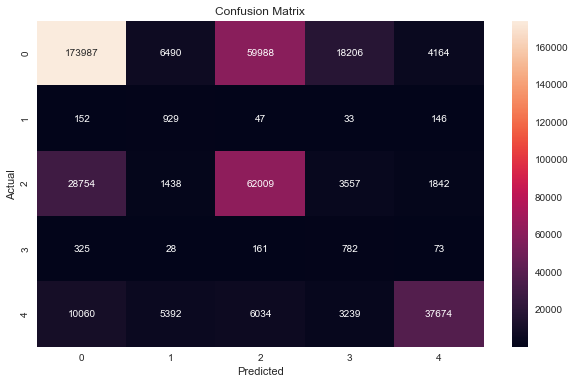

In [112]:
ac_sc = accuracy_score(y_test, result)
rc_sc = recall_score(y_test, result, average="weighted")
pr_sc = precision_score(y_test, result, average="weighted")
f1_sc = f1_score(y_test, result, average='micro')
confusion_m = confusion_matrix(y_test, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
visualize_confusion_matrix(y_test, result)

========== Random Forest Results ==========
Accuracy    :  0.8811598873954404
Recall      :  0.8811598873954404
Precision   :  0.8932577691167926
F1 Score    :  0.8811598873954404
Confusion Matrix: 


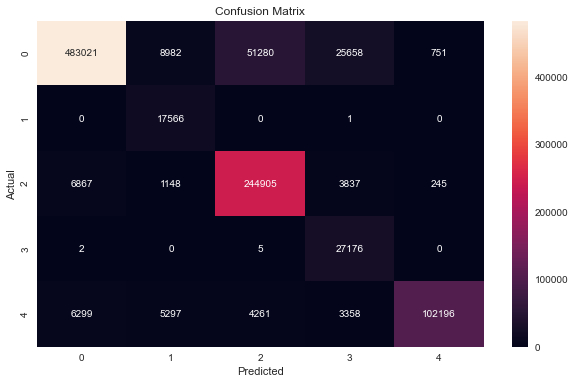

In [114]:
result = rf_model.predict(X_train)
ac_sc = accuracy_score(y_train, result)
rc_sc = recall_score(y_train, result, average="weighted")
pr_sc = precision_score(y_train, result, average="weighted")
f1_sc = f1_score(y_train, result, average='micro')
confusion_m = confusion_matrix(y_train, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
visualize_confusion_matrix(y_train, result)

## PCA

In [115]:
x_pca = dfp3.loc[:, dfp3.columns != 'Primary Type']
y_pca = y3


In [116]:
x_t, x_v, y_t, y_v = train_test_split(x_pca, y_pca, train_size=0.7,stratify=y_pca, random_state=50)
x_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992855 entries, 1054984 to 766241
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              992855 non-null  int64  
 1   Arrest                          992855 non-null  bool   
 2   Domestic                        992855 non-null  bool   
 3   Beat                            992855 non-null  int64  
 4   District                        992855 non-null  float64
 5   Ward                            992855 non-null  float64
 6   Community Area                  992855 non-null  float64
 7   X Coordinate                    992855 non-null  float64
 8   Y Coordinate                    992855 non-null  float64
 9   Year                            992855 non-null  int64  
 10  Latitude                        992855 non-null  float64
 11  Longitude                       992855 non-null  float64
 12  Month     

In [117]:
pca = PCA(n_components=0.9)
stand = StandardScaler()
x_t_pca = StandardScaler().fit_transform(x_t)
principalComponents = pca.fit_transform(x_t_pca)
principal_Df = pd.DataFrame(data = principalComponents)
principal_Df['y'] = y_t

In [118]:
principal_Df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,y
0,-3.306290,-1.446088,2.175549,-2.149405,-1.438139,-1.177066,1.542732,0.409734,0.031734,0.042734,...,0.143097,-0.073139,-0.064943,0.268785,-0.529352,-0.132373,0.146648,0.214976,0.658635,0
1,0.387104,0.320770,1.285201,-0.230421,2.391615,-0.764097,0.101268,-0.310011,-0.375662,0.104838,...,0.091344,0.144972,-0.248025,-0.732742,-0.144350,0.039445,1.738689,1.407419,0.046601,2
2,-3.662443,-1.400045,0.816480,0.884044,1.857396,-1.411365,-0.143080,-0.138971,-0.557588,-0.797162,...,-0.010620,0.051676,-0.103460,-0.267085,0.341271,-0.080195,0.712941,-1.471574,0.533499,2
3,-0.205530,1.598070,0.918874,-2.132407,0.860627,1.167521,-1.018913,-0.653942,0.000449,0.861614,...,0.024236,-0.108509,0.048961,0.128842,-1.055659,0.224218,-0.108689,1.582025,0.570352,2
4,1.043053,-1.741194,1.330216,1.182558,0.801131,0.690355,-0.067163,0.934781,2.033764,-0.274165,...,3.507758,-0.084229,0.365163,0.781428,-0.241080,-1.759981,-0.415475,0.984463,1.731476,0


In [119]:
x_v_pca = StandardScaler().fit_transform(x_v)

In [120]:
rf_model = RandomForestClassifier(n_estimators=40, # Number of trees 
                                  max_depth = 15)

# Model Training
rf_model.fit(X=x_t_pca,
             y=y_t)

# Prediction
result = rf_model.predict(x_v_pca)

========== Random Forest Results ==========
Accuracy    :  0.6579633851143334
Recall      :  0.6579633851143334
Precision   :  0.6673063848407113
F1 Score    :  0.6579633851143334
Confusion Matrix: 


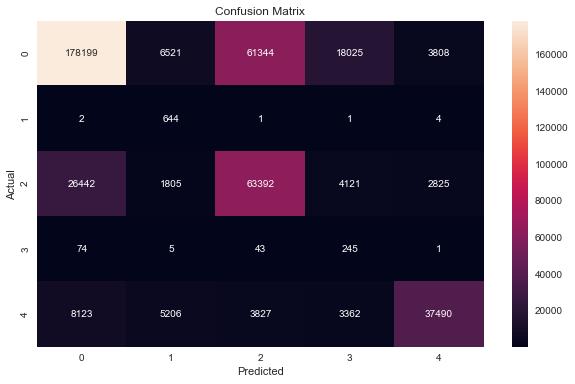

In [122]:
ac_sc = accuracy_score(y_v, result)
rc_sc = recall_score(y_v, result, average="weighted")
pr_sc = precision_score(y_v, result, average="weighted")
f1_sc = f1_score(y_v, result, average='micro')
confusion_m = confusion_matrix(y_v, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
visualize_confusion_matrix(y_v, result)

## CROSS VALIDATION

In [126]:
from sklearn.model_selection import cross_val_predict,GridSearchCV,KFold,LeaveOneOut,cross_val_score,train_test_split,StratifiedKFold

In [127]:
rf_model = RandomForestClassifier(n_estimators=40, # Number of trees 
                                  max_depth = 15)

In [215]:
y3=pd.factorize(dfp3["Primary Type"])[0] 

In [216]:
skf3_RF = KFold(n_splits = 3)
scores3_RF = cross_val_score(rf_model, X_t, y3, cv=skf3_RF)

In [217]:
skf3_preds = cross_val_predict(rf_model, X_t, y3, cv=skf3_RF)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores3_RF), np.std(scores3_RF)))

Accuracy: 0.654 (0.005)


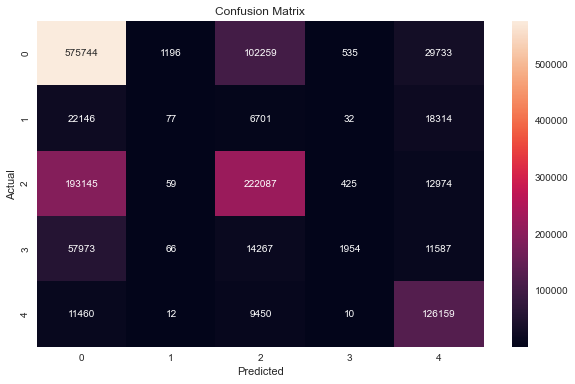

In [218]:
visualize_confusion_matrix(skf3_preds,y3)

In [219]:
y3OvA=y3
skf3_predsOvA=skf3_preds
for i in range(0,4):
    y3OvA[y3OvA == i] = 0
    skf3_predsOvA[skf3_predsOvA == i] = 0
y3OvA[y3OvA == 4] = 1
skf3_predsOvA[skf3_predsOvA == 4] = 1

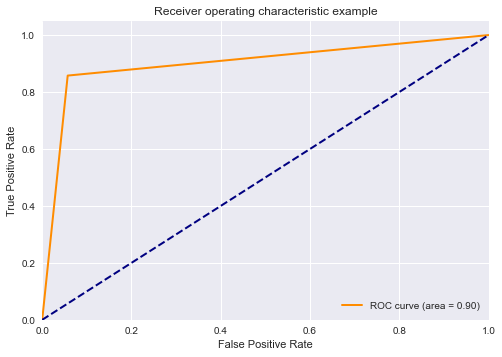

In [220]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_true = y3OvA,y_score = skf3_predsOvA)

roc_auc_knn=auc(fpr_knn,tpr_knn)

plt.figure()
lw = 2
plt.plot(
    fpr_knn,
    tpr_knn,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc_knn,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")

plt.show()

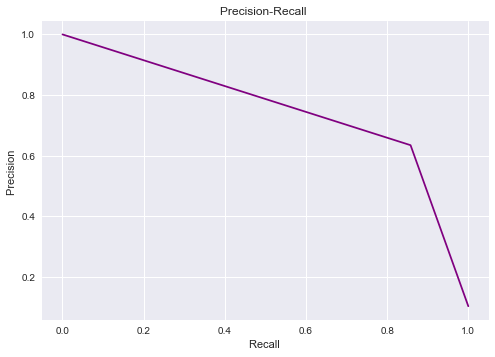

In [221]:
precision_knn,recall_knn,thresholds_knn = precision_recall_curve(y3OvA,skf3_predsOvA)


#create precision recall curve
fig,ax1 = plt.subplots()
ax1.plot(recall_knn, precision_knn, color='purple')

#add axis labels to plot
ax1.set_title('Precision-Recall ')
ax1.set_ylabel('Precision ')
ax1.set_xlabel('Recall ')

#display plot
plt.show()

In [212]:
y3=pd.factorize(dfp3["Primary Type"])[0] 

In [130]:
skf5_RF = KFold(n_splits = 5)
scores5_RF = cross_val_score(rf_model, X_t, y3, cv=skf5_RF)

In [206]:
skf5_preds = cross_val_predict(rf_model, X_t, y3, cv=skf5_RF)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores5_RF), np.std(scores5_RF)))

Accuracy: 0.657 (0.007)


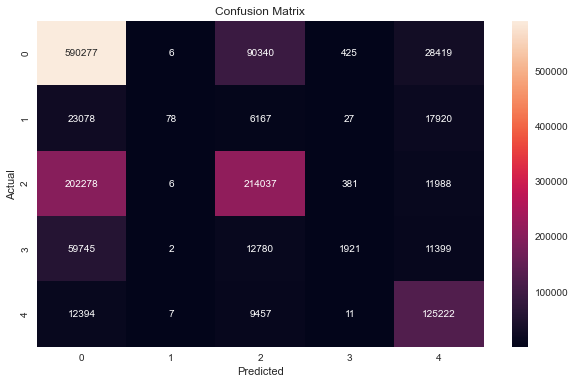

In [207]:
visualize_confusion_matrix(skf5_preds,y3)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [208]:
y3OvA=y3
skf5_predsOvA=skf5_preds
y3OvA[y3OvA == 0] =0
skf5_predsOvA[skf5_predsOvA == 0] = 0
for i in range(1,5):
    y3OvA[y3OvA == i] = 1
    skf5_predsOvA[skf5_predsOvA == i] = 1

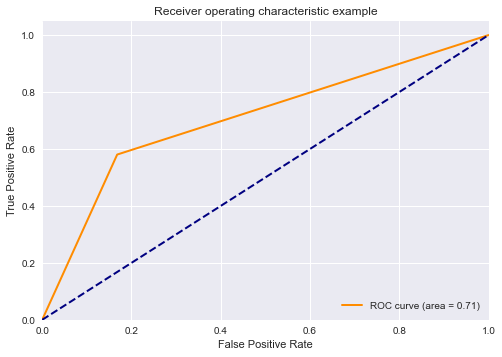

In [209]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_true = y3OvA,y_score = skf5_predsOvA)

roc_auc_knn=auc(fpr_knn,tpr_knn)

plt.figure()
lw = 2
plt.plot(
    fpr_knn,
    tpr_knn,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc_knn,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")


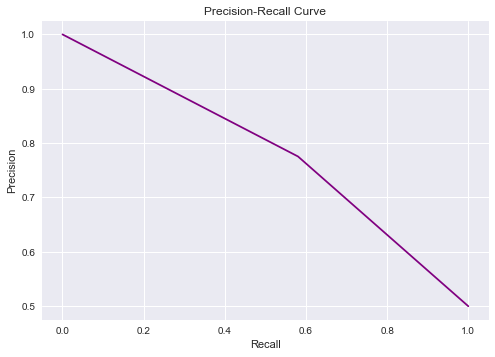

In [211]:
precision_knn,recall_knn,thresholds_knn = precision_recall_curve(y3OvA,skf5_predsOvA)


#create precision recall curve
fig,ax1 = plt.subplots()
ax1.plot(recall_knn, precision_knn, color='purple')

#add axis labels to plot
ax1.set_title('Precision-Recall Curve')
ax1.set_ylabel('Precision')
ax1.set_xlabel('Recall')

#display plot
plt.show()